#### Fase 2 | Aula 1 - Machine Learning com Python

##### Links do material conteudo
**Tomato**  
https://github.com/FIAP/Pos_Tech_DTAT/blob/61a634996879d5c1384af6f567e29659ad68b727/Aula%2002/Base%20de%20Dados/Tomato.csv

**Chess**  
https://github.com/FIAP/Pos_Tech_DTAT/blob/61a634996879d5c1384af6f567e29659ad68b727/Aula%2002/Base%20de%20Dados/Chess.xlsx

##### Importação de pacotes, bibliotecas e funções (def)

In [1]:
# Importar biblioteca completa
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import timeit

# Importar função especifica de um módulo

In [2]:
#Função para categorizar os tomates 

def categorizar_tomate_media(media):
    if media >= 40 and media <= 70:
        return "tomate_medio"
    elif media <40:
        return "tomate_pequeno"
    else:
        return "tomate_grande"

In [3]:
#Função para categorizar os tomates usando numpy 

def categorizar_tomate_media_np(df: pd.DataFrame, coluna: str, nova_coluna: str):

    # Condições
    condicoes = [
        (df[coluna] >= 40) & (df[coluna] <= 70),
        (df[coluna] < 40),
        (df[coluna] >70)
    ]

    # Valores associados às condições
    tipos = [
        "tomate_medio",
        "tomate_pequeno",
        "tomate_grande"
    ]

    df[nova_coluna] = np.select(condicoes, tipos, default="Não definido")

##### Aula 1 - Bibliotecas Fundamentais e Primeiros Passos em ML

In [4]:
# Usando a engine calamine devido a sua melhor performace se comparada com o openpyxl
df_excel = pd.read_excel("https://github.com/FIAP/Pos_Tech_DTAT/raw/61a634996879d5c1384af6f567e29659ad68b727/Aula%2002/Base%20de%20Dados/Chess.xlsx",sheet_name="Chess", engine= "calamine")

In [5]:
df_csv = pd.read_csv("https://raw.githubusercontent.com/FIAP/Pos_Tech_DTAT/61a634996879d5c1384af6f567e29659ad68b727/Aula%2002/Base%20de%20Dados/Tomato.csv", sep= ",")

In [6]:
df_excel.head()

,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,opening_eco,opening_name,opening_ply
0,False,1.504210e+17,1.504210e+17,13,outoftime,white,15+2,bourgris,1500,a-00,1191,D10,Slav Defense: Exchange Variation,5
1,True,1.504130e+17,1.504130e+17,16,resign,black,5+10,a-00,1322,skinnerua,1261,B00,Nimzowitsch Defense: Kennedy Variation,4
2,True,1.504130e+17,1.504130e+17,61,mate,white,5+10,ischia,1496,a-00,1500,C20,King's Pawn Game: Leonardis Variation,3
3,True,1.504110e+17,1.504110e+17,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,D02,Queen's Pawn Game: Zukertort Variation,3
4,True,1.504030e+17,1.504030e+17,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,C41,Philidor Defense,5


In [7]:
df_csv.tail()

,Date,Unit,Minimum,Maximum,Average,Market
2736,2021-05-09,Kg,10,15,12.5,Tomato
2737,2021-05-10,Kg,10,15,12.5,Tomato
2738,2021-05-11,Kg,10,15,12.5,Tomato
2739,2021-05-12,Kg,30,35,32.5,Tomato
2740,2021-05-13,Kg,35,40,37.5,Tomato


In [8]:
# Forma resumida do total de linhas e colunas do data frame 
df_csv.shape

(2741, 6)

In [9]:
# Resumo da base de dados com mais informações
df_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rated           20058 non-null  bool   
 1   created_at      20058 non-null  float64
 2   last_move_at    20058 non-null  float64
 3   turns           20058 non-null  int64  
 4   victory_status  20058 non-null  object 
 5   winner          20058 non-null  object 
 6   increment_code  20058 non-null  object 
 7   white_id        20058 non-null  object 
 8   white_rating    20058 non-null  int64  
 9   black_id        20058 non-null  object 
 10  black_rating    20058 non-null  int64  
 11  opening_eco     20058 non-null  object 
 12  opening_name    20058 non-null  object 
 13  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(7)
memory usage: 2.0+ MB


In [10]:
# Fazer uma estatistica descritiva dos dados 
df_excel.describe()

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
count,2.005800e+04,2.005800e+04,20058.000000,20058.000000,20058.000000,20058.000000
mean,6.321335e+16,6.313080e+16,60.465999,1596.631868,1588.831987,4.816981
std,7.292307e+16,7.290633e+16,33.570585,291.253376,291.036126,2.797152
min,1.376772e+12,1.376772e+12,1.000000,784.000000,789.000000,1.000000
25%,1.498313e+12,1.498315e+12,37.000000,1398.000000,1391.000000,3.000000
50%,1.504366e+12,1.504367e+12,55.000000,1567.000000,1562.000000,4.000000
75%,1.486680e+17,1.486680e+17,79.000000,1793.000000,1784.000000,6.000000
max,1.504470e+17,1.504470e+17,349.000000,2700.000000,2723.000000,28.000000


In [11]:
# Fazer uma estatistica descritiva dos dados de forma transposta
df_excel.describe().T

,count,mean,std,min,25%,50%,75%,max
created_at,20058.0,6.321335e+16,7.292307e+16,1.376772e+12,1.498313e+12,1.504366e+12,1.486680e+17,1.504470e+17
last_move_at,20058.0,6.313080e+16,7.290633e+16,1.376772e+12,1.498315e+12,1.504367e+12,1.486680e+17,1.504470e+17
turns,20058.0,6.046600e+01,3.357058e+01,1.000000e+00,3.700000e+01,5.500000e+01,7.900000e+01,3.490000e+02
white_rating,20058.0,1.596632e+03,2.912534e+02,7.840000e+02,1.398000e+03,1.567000e+03,1.793000e+03,2.700000e+03
black_rating,20058.0,1.588832e+03,2.910361e+02,7.890000e+02,1.391000e+03,1.562000e+03,1.784000e+03,2.723000e+03
opening_ply,20058.0,4.816981e+00,2.797152e+00,1.000000e+00,3.000000e+00,4.000000e+00,6.000000e+00,2.800000e+01


In [12]:
# Variações de informações de uma coluna - ± igual ao distinct do SQL
set(df_excel["victory_status"])

{'draw', 'mate', 'outoftime', 'resign'}

In [13]:
# Criar nova coluna categoria_tomate usando a função
df_csv["categoria_tomate"] = df_csv["Average"].apply(categorizar_tomate_media)
df_csv.head()

,Date,Unit,Minimum,Maximum,Average,Market,categoria_tomate
0,2013-06-16,Kg,26,32,29.0,Tomato,tomate_pequeno
1,2013-06-17,Kg,20,25,22.5,Tomato,tomate_pequeno
2,2013-06-18,Kg,22,26,24.0,Tomato,tomate_pequeno
3,2013-06-19,Kg,24,28,26.0,Tomato,tomate_pequeno
4,2013-06-20,Kg,22,26,24.0,Tomato,tomate_pequeno


In [14]:
# Criar nova coluna categoria_tomate usando a função com numpy
df_teste = df_csv.copy()
df_teste["categoria_tomate"] = categorizar_tomate_media_np(df_teste,"Average", "categoria_tomate")
df_teste.head()

# Criar um novo data frame apenas para usar no teste
df_teste_apply = df_csv.copy()

# Comparar o tempo das duas funções: 
numero_rep = 1

tempo_apply = timeit.timeit(
    "df_teste_apply['Average'].apply(categorizar_tomate_media)",
    globals=globals(),
    number=numero_rep
)
print(f"Média tempo apply ({numero_rep} execuções): {tempo_apply/numero_rep:.6f} segundos")

tempo_numpy = timeit.timeit(
    "categorizar_tomate_media_np(df_teste, 'Average', 'categoria_tomate')",
    globals=globals(),
    number=10
)
print(f"Média tempo numpy ({numero_rep} execuções): {tempo_numpy/numero_rep:.6f} segundos")

Média tempo apply (1 execuções): 0.006963 segundos
Média tempo numpy (1 execuções): 0.078646 segundos


In [15]:
df_csv.groupby(["categoria_tomate"]).describe()

Minimum                                                      \
                   count       mean       std   min   25%   50%   75%    max   
categoria_tomate                                                               
tomate_grande      149.0  75.744966  7.324666  65.0  70.0  75.0  80.0  115.0   
tomate_medio       954.0  47.818658  8.203065  30.0  40.0  45.0  55.0   65.0   
tomate_pequeno    1638.0  23.978022  7.175572   8.0  18.0  25.0  30.0   38.0   

                 Maximum             ...              Average             \
                   count       mean  ...   75%    max   count       mean   
categoria_tomate                     ...                                   
tomate_grande      149.0  82.583893  ...  85.0  120.0   149.0  79.164430   
tomate_medio       954.0  55.009434  ...  60.0   75.0   954.0  51.414046   
tomate_pequeno    1638.0  29.528694  ...  35.0   44.0  1638.0  26.753358   

                                                           
                       std   min   25%   50%   75%    max  
categoria_tomate                                           
tomate_grande     7.367396  70.5  75.0  77.5  82.5  117.5  
tomate_medio      8.272792  40.0  45.0  50.0  57.5   70.0  
tomate_pequeno    7.191735  10.0  21.5  27.5  32.5   39.5  

[3 rows x 24 columns]

In [16]:
df_csv.groupby(["categoria_tomate"]).describe().T

categoria_tomate  tomate_grande  tomate_medio  tomate_pequeno
Minimum count        149.000000    954.000000     1638.000000
        mean          75.744966     47.818658       23.978022
        std            7.324666      8.203065        7.175572
        min           65.000000     30.000000        8.000000
        25%           70.000000     40.000000       18.000000
        50%           75.000000     45.000000       25.000000
        75%           80.000000     55.000000       30.000000
        max          115.000000     65.000000       38.000000
Maximum count        149.000000    954.000000     1638.000000
        mean          82.583893     55.009434       29.528694
        std            7.622070      8.541910        7.323327
        min           73.000000     42.000000       12.000000
        25%           80.000000     50.000000       25.000000
        50%           80.000000     55.000000       30.000000
        75%           85.000000     60.000000       35.000000
        max          120.000000     75.000000       44.000000
Average count        149.000000    954.000000     1638.000000
        mean          79.164430     51.414046       26.753358
        std            7.367396      8.272792        7.191735
        min           70.500000     40.000000       10.000000
        25%           75.000000     45.000000       21.500000
        50%           77.500000     50.000000       27.500000
        75%           82.500000     57.500000       32.500000
        max          117.500000     70.000000       39.500000

In [17]:
#Realizar filtro com loc 
filtro = df_csv["Average"] < 40
df_csv.loc[filtro]

,Date,Unit,Minimum,Maximum,Average,Market,categoria_tomate
0,2013-06-16,Kg,26,32,29.0,Tomato,tomate_pequeno
1,2013-06-17,Kg,20,25,22.5,Tomato,tomate_pequeno
2,2013-06-18,Kg,22,26,24.0,Tomato,tomate_pequeno
3,2013-06-19,Kg,24,28,26.0,Tomato,tomate_pequeno
4,2013-06-20,Kg,22,26,24.0,Tomato,tomate_pequeno
...,...,...,...,...,...,...,...
2736,2021-05-09,Kg,10,15,12.5,Tomato,tomate_pequeno
2737,2021-05-10,Kg,10,15,12.5,Tomato,tomate_pequeno
2738,2021-05-11,Kg,10,15,12.5,Tomato,tomate_pequeno
2739,2021-05-12,Kg,30,35,32.5,Tomato,tomate_pequeno


In [18]:
# Criar uma lista ou array
arr_list = np.array([1,2,3,4,5,6,7,8])
print(arr_list)

[1 2 3 4 5 6 7 8]


In [19]:
# Criar uma matriz de 0 
arr_zeros = np.zeros((4,6)) # qtd de linhas e colunas
print(arr_zeros)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


In [20]:
# Criar uma matriz de 1
arr_ones = np.ones((3,4)) # qtd de linhas e colunas
print(arr_ones)

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


In [21]:
# Criar uma matriz aleatoria 
arr_random = np.random.rand(3,4) # qtd de linhas e colunas
print(arr_random)

[[0.26062399 0.63753581 0.65626276 0.2696619 ]
 [0.97622387 0.62516091 0.20908089 0.4946109 ]
 [0.0301485  0.61061777 0.15835668 0.58828922]]


In [22]:
# Verificar o tipo de dimensão
print(arr_random.shape)

(3, 4)


In [23]:
# Mudar a estrutura da matriz 

arr_random_reshape = arr_random.reshape((4,3))
print(arr_random_reshape)

[[0.26062399 0.63753581 0.65626276]
 [0.2696619  0.97622387 0.62516091]
 [0.20908089 0.4946109  0.0301485 ]
 [0.61061777 0.15835668 0.58828922]]


In [24]:
arr1 = np.array([[1,2],[3,4]])
arr2 = np.array([[5,6],[7,8]])
arr3 = np.array([[9,10],[11,12]])

In [25]:
# Concatenar os array
arr4 = np.concatenate((arr1,arr2,arr3), axis=1) 
arr4

array([[ 1,  2,  5,  6,  9, 10],
       [ 3,  4,  7,  8, 11, 12]])

In [26]:
# Separar os dados 
arr4_split = np.split(arr4,2)
print(arr4_split)

[array([[ 1,  2,  5,  6,  9, 10]]), array([[ 3,  4,  7,  8, 11, 12]])]


In [27]:
# Transpo a matriz
arr4_transpose= np.transpose(arr4)
print(arr4_transpose)

[[ 1  3]
 [ 2  4]
 [ 5  7]
 [ 6  8]
 [ 9 11]
 [10 12]]


In [28]:
# Voltar a matriz como era antes
arr4_revertido = arr4_transpose.T
arr4_revertido

array([[ 1,  2,  5,  6,  9, 10],
       [ 3,  4,  7,  8, 11, 12]])

In [29]:
# Criar os array
arr_a = np.array([1,7,27])
arr_b = np.array([1,5,1])

# Somar as matrizes
arr_a_b = np.add(arr_a , arr_b)
arr_a_b

array([ 2, 12, 28])

In [30]:
# Subtrair as matrizes
arr_sub_a_b = np.subtract(arr_a,arr_b)
arr_sub_a_b

array([ 0,  2, 26])

In [31]:
# Converter para date 
df_tomato = df_csv.copy()
df_tomato["Date"] = pd.to_datetime(df_tomato["Date"])
df_tomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2741 entries, 0 to 2740
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              2741 non-null   datetime64[ns]
 1   Unit              2741 non-null   object        
 2   Minimum           2741 non-null   int64         
 3   Maximum           2741 non-null   int64         
 4   Average           2741 non-null   float64       
 5   Market            2741 non-null   object        
 6   categoria_tomate  2741 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 150.0+ KB


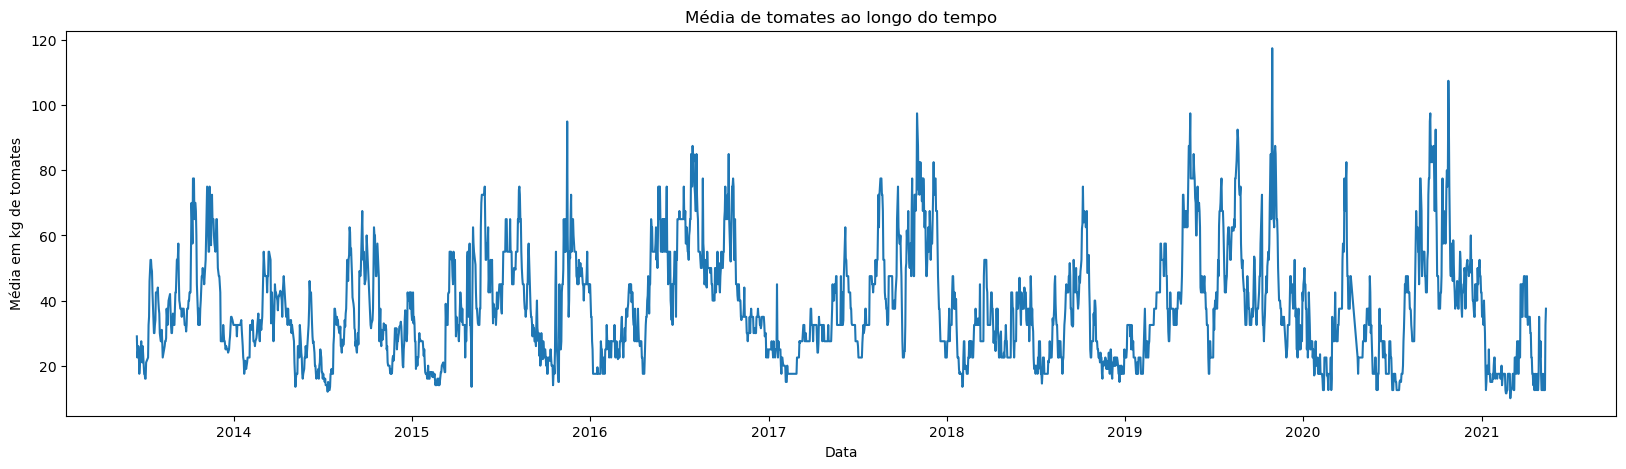

In [32]:
# Plotar grafico de linha

plt.figure(figsize=(20,5)) # Tamanho do grafico
plt.plot(df_tomato["Date"],df_tomato["Average"]) # informado o eixo x e y para plotar o grafico 
plt.xlabel("Data") # Nome do eixo x 
plt.ylabel("Média em kg de tomates") # Nome do eixo y
plt.title("Média de tomates ao longo do tempo") # Titulo do grafico
plt.show()

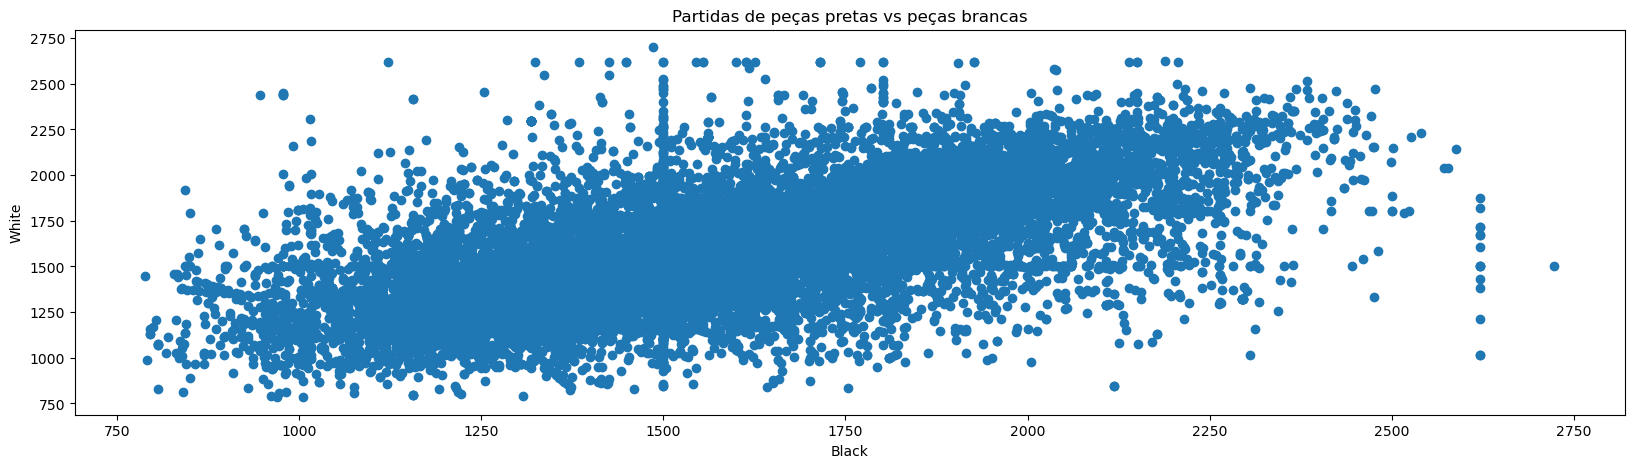

In [33]:
# Plotar grafico de dispersão 

df_chess = df_excel.copy()

plt.figure(figsize=(20,5)) # Tamanho do grafico
plt.scatter(df_chess["black_rating"],df_chess["white_rating"])
plt.xlabel("Black")
plt.ylabel("White")
plt.title("Partidas de peças pretas vs peças brancas")
plt.show()


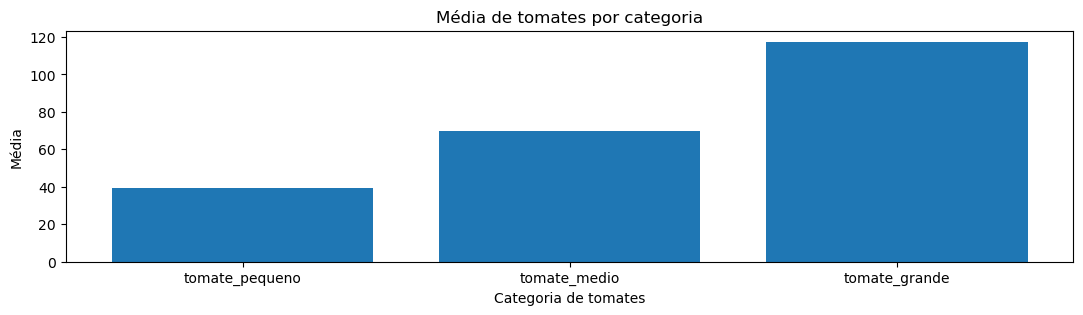

In [34]:
# Plotar grafico de barras 

plt.figure(figsize=(13,3)) # Tamanho do grafico
plt.bar(df_tomato["categoria_tomate"],df_tomato["Average"])
plt.xlabel("Categoria de tomates")
plt.ylabel("Média")
plt.title("Média de tomates por categoria")
plt.show()

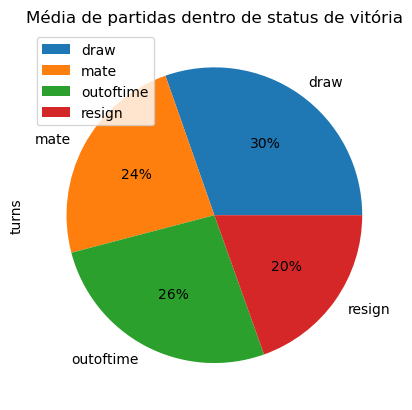

In [35]:
# Plotar grafico de pizza 

df_chess.groupby(["victory_status"]).mean(numeric_only=True).plot(kind="pie", y="turns", autopct="%1.0f%%")
plt.title("Média de partidas dentro de status de vitória")
plt.show()